In [231]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Import

In [ ]:
pip install numpy

In [ ]:
pip install pandas

In [ ]:
pip install bs4

In [ ]:
pip install requests

In [ ]:
pip install nltk

# Jupyter notebooks

* This is a Jupyter notebook!
* Interactive. Popular in data science
* Used with Python, R, Julia.
* Mine looks slightly different
* Command vs. Edit mode
* Blocks are called "cells".
    * Run cells: ctrl/cmd + enter/return
    * New cells above: ctrl/cmd + a 
    * Code vs. md.
* Is it running?

# Ethics Of Web-Scraping

* Am I allowed to access this data? 
    * https://www.chefknivestogo.com/robots.txt
* Can the site handle my requests?
    * https://www.nrcs.usda.gov/robots.txt
* Can I use it in my research? What can I use it for?
    * https://meta.wikimedia.org/wiki/Terms_of_use

# Background: Functions, Data Types, and Pandas

## Data Types

### int (integer)

In [1]:
type(5)

int

### float (number with decimal point)

In [3]:
type(5.0)

float

### bool (True/False)

In [5]:
print(type(True))

# bools can act as ones (True) and zeros (False)
print(True + True)

print(False + False)

<class 'bool'>
2
0


### str (characters)

In [9]:
print(type('a string'))

test_str = 'a string'

print(len(test_str))

print(test_str.split())

['a', 'string']


### list

* Store multiple items (elements) in a single variable, e.g., three integers (ints). 
* Elements are separated by commas.

**Note that indices start at 0 in Python!**

In [7]:
# initialize a list
test_list = [0, 1, 2]

# print the list
print(test_list)

[0, 1, 2]


In [8]:
# print the 0th element
print(test_list[0])

0


In [9]:
# get the length of the list (number of elements in it)
len(test_list)

3

In [10]:
# lists can have mixed datatypes (pretty much anything can be put in a list)
test_list_2 = ['a', 2, [4,5]]

In [14]:
# add two lists together
# technically, this is called "concattenating" the first and second lists

print(test_list + test_list_2)

[0, 1, 2, 'a', 2, [4, 5]]

In [11]:
# list comprehension is an easy way to modify and/or filter lists
# GENERAL SYNTAX: 
    # new_list = [x for x in old_list]

# use list comprehension to recreate the same list (just to show how it works)
print([y for y in test_list])

# use list comprehension to add five to each element
print([x+5 for x in test_list])

# use list comprehension to add five to each element - using our predefined FUNCTION
print([add_five(elmnt) for elmnt in test_list])

# use list comprehension to add five to each element, AND filter them
print([x+5 for x in test_list if (x==0 or x==1)])

[0, 1, 2]
[5, 6, 7]
[5, 6, 7]
[5, 6]


### Dict (dictionary)

A dictionary is a correspondence of key:value pairings which allow you to look up values from keys!

In [19]:
# initialize a dictionary. Keys and values can be basically any datatype ()
test_dict = {'key1':'value1', 2:'value2'}

In [20]:
# look up first value via key
print(test_dict['key1'])

{'key1': 'value1', 2: 'value2'}


In [22]:
test_dict['value1']

KeyError: 'value1'

## Functions

In [23]:
def add_five(number):
    return number + 5

In [24]:
add_five(10)

15

In [26]:
new_list = [add_five(x) for x in test_list]

print(test_list)
print(new_list)

[0, 1, 2]
[5, 6, 7]


## Pandas

https://pandas.pydata.org/pandas-docs/stable/index.html

### DataFrame

In [29]:
test_dict = {'col1':[1,2,3], 'col2':[4,5,6]}

test_df = pd.DataFrame(test_dict)

In [32]:
test_df

,col1,col2
0,1,4
1,2,5
2,3,6


In [33]:
test_df['col1']

0    1
1    2
2    3
Name: col1, dtype: int64

In [34]:
test_df.iloc[0]

col1    1
col2    4
Name: 0, dtype: int64

In [36]:
test_df['new col1'] = test_df['col1'].apply(add_five)

In [37]:
test_df

,col1,col2,new col1
0,1,4,6
1,2,5,7
2,3,6,8


## Functions

A function is a block of reusable code that can be used repeatedly to perform a
single action.

In [2]:
# define a function to add five to a number
def add_five(number):
    return number + 5

In [3]:
# apply our function
add_five(10)

15

## Data Types

# Web Scraping

## Import Necessary packages

Earlier, we *installed* the necessary packages with the "pip install [package]" commands

Now, we *import* the packages so we can use them

In [4]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
import nltk

# import time



## pd.read_html() - USDA FIPS

* URL
    * https://www.nrcs.usda.gov/wps/portal/nrcs/detail/national/home/?cid=nrcs143_013697
* .
    *  

In [ ]:
# import data from USDA. Output is a LIST of tables
usda_fips_page = pd.read_html("https://www.nrcs.usda.gov/wps/portal/nrcs/detail/national/home/?cid=nrcs143_013697")

In [ ]:
# print output to see what we have...
usda_fips_page

In [ ]:
# Strange output!
usda_fips_page[0]

In [ ]:
# looks like the first few dataframes are identical... this is strange but we only need one so it isn't a problem!
usda_fips_page[1]

In [ ]:
# make variable for fips table we want
usda_fips = usda_fips_page[0]

In [ ]:
# let's examine the dataframe more closely to make sure everything is correct

# change display options to show all rows
pd.set_option('display.max_rows', None)

usda_fips

In [ ]:
# it looks like the last row is the only incorrect one, so let's delete it
usda_fips.tail()

In [ ]:
# Let's confirm there are no other rows we need to drop. Check for nan values in any col pt. 1
usda_fips.isnull()

In [ ]:
# Check for nan values in any col pt. 2
usda_fips.isnull().sum()

In [ ]:
# drop the last row

# this is the output we want
usda_fips.drop(3232)

# now replace the existing "usda_fips" dataframe with the version missing the last row (inplace=True)
usda_fips.drop(3232, inplace=True)

## pd.read_html() -  FIPS

In [ ]:
# import data from wikipedia. Again, output is a LIST of tables
fips_page = pd.read_html("https://en.wikipedia.org/wiki/List_of_United_States_FIPS_codes_by_county")

In [ ]:
# let's print the output and take a look...
fips_page

In [ ]:
# first element?
fips_page[0]

In [ ]:
fips_page[1]

In [ ]:
# we want the 2nd table (recall: indices start at 0)
fips = fips_page[1]

# remove all hyperlinks (these look like "... County [h]", etc.)
fips['County or equivalent'] = fips['County or equivalent'].str.replace(r"\[.*\]","")

# convert to uppercase
fips['County or equivalent'] = fips['County or equivalent'].apply(lambda x: x.upper())
fips['State or equivalent'] = fips['State or equivalent'].apply(lambda x: x.upper())

# replace "St." with "Saint"
fips['County or equivalent'] = [x.replace('ST.','SAINT') for x in fips['County or equivalent']]

# remove everything after a comma in a county name (e.g. "ANCHORAGE, MUNICIPALITY OF")
fips['County or equivalent'] = [x.split(',')[0] for x in fips['County or equivalent']]

# replace DC info to correspond to GeoCov19 format
dc_loc = fips[fips['County or equivalent']=='DISTRICT OF COLUMBIA'].index.tolist()[0]
fips['State or equivalent'].loc[dc_loc] = 'WASHINGTON, D.C.'
fips['County or equivalent'].loc[dc_loc] = 'WASHINGTON'

############################################################################################

# Save FIPS dataframe to file

FIPS_SAVE_PATH = 

fips.to_csv(FIPS_SAVE_PATH, index=False)

## Request  + BeautifulSoup

 Red-bellied Snake (Wikipedia) Text Analysis

### Red-bellied Snake (Wikipedia) Text Analysis

Hypothetical: we want to get a list of all words, and their frequency, from this wikipedia page

In [ ]:
# use requests to get URL
wiki_snake_url = "https://en.wikipedia.org/wiki/Red-bellied_black_snake"
wiki_snake_response = requests.get(wiki_snake_url)

# it prints "200" if the page was successfully downloaded!
print(wiki_snake_response)

In [ ]:
#let's examine the output... which turns out to be a mess (this is where BeautifulSoup comes in handy)
wiki_snake_response.text

In [ ]:
# use BeautifulSoup's html parser to convert the html document into a BeautifulSoup object
wiki_snake_soup = BeautifulSoup(wiki_snake_response.text, 'html.parser')

# BeautifulSoup gives us a more readable format (barely - it doesn't make a huge difference in this example)
wiki_snake_soup.prettify()

In [ ]:
# we need to display the text! Let's get all elements with a "p" (paragraph) tag 

# print([paragraph.text for paragraph in wiki_snake_soup.find_all('p')])

# this shows us all html with a "p" tag (paragraphs), but we just want the text
for paragraph in wiki_snake_soup.find_all('p'):
    print(paragraph)

In [ ]:
# here is how we display the pure text

for paragraph in wiki_snake_soup.find_all('p'):
    print(paragraph.text)
    

In [ ]:
# we're almost there, we just need to combine this output (we'll use list comprehension)

wiki_snake_text = ' '.join([paragraph.text for paragraph in wiki_snake_soup.find_all('p')])

wiki_snake_text
#[paragraph.text for paragraph in wiki_snake_soup.find_all('p')] is a list!

# #this is equivalent to the following code which some might find more familiar:
# wiki_snake_text_list = []

# for paragraph in wiki_snake_soup.find_all('p'):
#     wiki_snake_text_list.append(paragraph)
    
# wiki_snake_text = ' '.join(wiki_snake_text)

In [ ]:
# ' '.join(wiki_snake_text.split())

In [ ]:
# now let's count occurences of each word
# import nltk

nltk.FreqDist(wiki_snake_text)

In [ ]:
# looks like we need to split the text first:
split_wiki_snake_text = wiki_snake_text.split()

In [ ]:
wiki_snake_word_freqs = nltk.FreqDist(split_wiki_snake_text)

In [ ]:
wiki_snake_word_freqs

In [ ]:
wiki_snake_output = pd.DataFrame({'Word': wiki_snake_word_freqs.keys(), 'Frequency': wiki_snake_word_freqs.values()})

In [ ]:
wiki_snake_output

In [ ]:
wiki_snake_output.sort_values('Frequency', ascending=False, inplace=True)

In [ ]:
wiki_snake_num_words = wiki_snake_output['Frequency'].sum()

In [ ]:
wiki_snake_output['% Freq'] = (wiki_snake_output['Frequency'] / wiki_snake_num_words) * 100

In [ ]:
wiki_snake_output

In [ ]:
wiki_snake_output.to_csv("Red Bellied Snake Words & Frequencies.csv")

## Request  + BeautifulSoup - lichess.org user stats

Let's get the information of every top "bullet" chess player

Our approach:
* Get the list of top bullet players
    * Listed at https://lichess.org/player/top/200/bullet
* Go to each player's account
    * Account page URLs have the following structure: "https://lichess.org/@/" + username
* Get the information we need and compile it into a pandas DataFrame
    * Do this by writing several functions to get specific pieces of information
    
* Save the dataframe as a .csv file

In [164]:
# here are the top bullet players: https://lichess.org/player/top/200/bullet

# scrape this table!
players_df_list = pd.read_html("https://lichess.org/player/top/200/bullet")

# let's see the output:
players_df_list

[       0                     1     2     3
 0      1     GM nihalsarin2004  3101  25.0
 1      2         GM C9C9C9C9C9  3068  21.0
 2      3    GM Zhigalko_Sergei  3051  26.0
 3      4           GM muisback  3018  15.0
 4      5             GM Arka50  3016  29.0
 ..   ...                   ...   ...   ...
 195  196         GM elshan1985  2780  28.0
 196  197  GM tornike_sanikidze  2780  17.0
 197  198        Hellblazer2007  2780  30.0
 198  199             Likonendy  2779   3.0
 199  200           FM Kaldas90  2778   2.0
 
 [200 rows x 4 columns]]

In [165]:
# looks like we only need/want the first dataframe in this list (turns out there's only one anyway)
players_df = players_df_list[0]

del players_df_list

In [166]:
players_df

,0,1,2,3
0,1,GM nihalsarin2004,3101,25.0
1,2,GM C9C9C9C9C9,3068,21.0
2,3,GM Zhigalko_Sergei,3051,26.0
3,4,GM muisback,3018,15.0
4,5,GM Arka50,3016,29.0
...,...,...,...,...
195,196,GM elshan1985,2780,28.0
196,197,GM tornike_sanikidze,2780,17.0
197,198,Hellblazer2007,2780,30.0
198,199,Likonendy,2779,3.0


In [167]:
# column 0 is the user's ranking, and column 3 is their recent rating change. we aren't interested in either, so let's delete them
del players_df[0], players_df[3]

players_df

,1,2
0,GM nihalsarin2004,3101
1,GM C9C9C9C9C9,3068
2,GM Zhigalko_Sergei,3051
3,GM muisback,3018
4,GM Arka50,3016
...,...,...
195,GM elshan1985,2780
196,GM tornike_sanikidze,2780
197,Hellblazer2007,2780
198,Likonendy,2779


In [168]:
# now let's rename the columns to more helpful labels
players_df.rename(columns={1:'User', 2:'Rating'})

,User,Rating
0,GM nihalsarin2004,3101
1,GM C9C9C9C9C9,3068
2,GM Zhigalko_Sergei,3051
3,GM muisback,3018
4,GM Arka50,3016
...,...,...
195,GM elshan1985,2780
196,GM tornike_sanikidze,2780
197,Hellblazer2007,2780
198,Likonendy,2779


In [169]:
players_df.rename(columns={1:'User', 2:'Rating'}, inplace=True)

In [170]:
# make a short function to give us individual players' urls from username, for convenience
def indiv_URL_formula(username):
    return "https://lichess.org/@/" + username

In [171]:
# url of first user's account
# "https://lichess.org/@/" + ' '.join(players_df['User'].iloc[0].split())
indiv_URL_formula(players_df['User'].iloc[0])

# equivalent to: "https://lichess.org/@/" + players_df['User'].iloc[0]

'https://lichess.org/@/GM\xa0nihalsarin2004'

In [172]:
# replace "/xa0"

def replace_xa0(username):
    '''
    input = a player's username (string)
    output = a player's username, with "\xa0" replaced by " "
    '''
    return username.replace("\xa0", " ")

# apply this function to our dataframe
## first, let's check to see that it returns the right output
players_df['User'].apply(replace_xa0)

## looks good (or at least not harmful), so let's replace the username
players_df['User'] = players_df['User'].apply(replace_xa0)

In [173]:
# retry printing url of first user's account
indiv_URL_formula(players_df['User'].iloc[0])

'https://lichess.org/@/GM nihalsarin2004'

In [174]:
# we need to split the "User" column, otherwise we get urls like "https://lichess.org/@/GM RebeccaHarris" instead of "https://lichess.org/@/RebeccaHarris"

def get_user(title_user_str):
    """
    title_user_str looks like "GM RebeccaHarris" or "Shprot86"
    """
#     print(title_user_str)
    if len(title_user_str.split())==2:    #if the user is titled (has two words in their user field, rather than one)
#         print(title_user_str.split()[1])
        return title_user_str.split()[1]   #return their username
    else:    # if the user is not titled (has one word in their user field)
        return title_user_str    #return the input string, since it is already their username without a title


def get_title(title_user_str):
    """
    title_user_str looks like "GM RebeccaHarris" or "Shprot86"
    """
    if len(title_user_str.split())==2:    #if the user is titled (has two words in their user field, rather than one)
        return title_user_str.split()[0]   #return their title
    else:    # if the user is not titled (has one word in their user field)
        return  np.nan    #return a missing value

    
players_df['Username'] = players_df['User'].apply(get_user)
players_df['Title'] = players_df['User'].apply(get_title)

In [175]:
players_df

,User,Rating,Username,Title
0,GM nihalsarin2004,3101,nihalsarin2004,GM
1,GM C9C9C9C9C9,3068,C9C9C9C9C9,GM
2,GM Zhigalko_Sergei,3051,Zhigalko_Sergei,GM
3,GM muisback,3018,muisback,GM
4,GM Arka50,3016,Arka50,GM
...,...,...,...,...
195,GM elshan1985,2780,elshan1985,GM
196,GM tornike_sanikidze,2780,tornike_sanikidze,GM
197,Hellblazer2007,2780,Hellblazer2007,NaN
198,Likonendy,2779,Likonendy,NaN


In [176]:
players_df['URL'] = players_df['Username'].apply(indiv_URL_formula)

In [177]:
players_df

,User,Rating,Username,Title,URL
0,GM nihalsarin2004,3101,nihalsarin2004,GM,https://lichess.org/@/nihalsarin2004
1,GM C9C9C9C9C9,3068,C9C9C9C9C9,GM,https://lichess.org/@/C9C9C9C9C9
2,GM Zhigalko_Sergei,3051,Zhigalko_Sergei,GM,https://lichess.org/@/Zhigalko_Sergei
3,GM muisback,3018,muisback,GM,https://lichess.org/@/muisback
4,GM Arka50,3016,Arka50,GM,https://lichess.org/@/Arka50
...,...,...,...,...,...
195,GM elshan1985,2780,elshan1985,GM,https://lichess.org/@/elshan1985
196,GM tornike_sanikidze,2780,tornike_sanikidze,GM,https://lichess.org/@/tornike_sanikidze
197,Hellblazer2007,2780,Hellblazer2007,NaN,https://lichess.org/@/Hellblazer2007
198,Likonendy,2779,Likonendy,NaN,https://lichess.org/@/Likonendy


In [178]:
players_df['URL']

0         https://lichess.org/@/nihalsarin2004
1             https://lichess.org/@/C9C9C9C9C9
2        https://lichess.org/@/Zhigalko_Sergei
3               https://lichess.org/@/muisback
4                 https://lichess.org/@/Arka50
                        ...                   
195           https://lichess.org/@/elshan1985
196    https://lichess.org/@/tornike_sanikidze
197       https://lichess.org/@/Hellblazer2007
198            https://lichess.org/@/Likonendy
199             https://lichess.org/@/Kaldas90
Name: URL, Length: 200, dtype: object

#### Write functions to get statistics from individual pages

In [179]:
# first, let's scrape the first user's page, so we have an example to work with
first_player_url = "https://lichess.org/@/" + players_df['Username'].iloc[0]

first_player_response = requests.get(first_player_url)
    
first_player_soup = BeautifulSoup(first_player_response.text, 'html.parser')

In [180]:
# GET NAME

# select elements
first_player_soup.select('.name')

# get text from selected elements
[x.text for x in first_player_soup.select('.name')]

# get name from list of names (even though it's just a list of length 1)
[x.text for x in first_player_soup.select('.name')][0]



# final fnc
def get_name(player_soup):
    try:
        return [x.text for x in player_soup.select(".name")][0]
    except:
        return np.nan

In [181]:
# select elements
first_player_soup.select('.user-show__social .nm-item:nth-child(1)')

# get text from selected elements
[x.text for x in first_player_soup.select('.user-show__social .nm-item:nth-child(1)')]

num_followers = [x.text for x in first_player_soup.select('.user-show__social .nm-item:nth-child(1)')][0]
num_followers

# split followers string at the letter "f" to isolate the numbers
num_followers = num_followers.split('f')[0]

# remove comma from number
num_followers = num_followers.replace(',','')

num_followers = int(num_followers)

print(num_followers)



# final fnc
def get_num_followers(player_soup):
    num_followers = player_soup.select('.user-show__social .nm-item:nth-child(1)')
                                        
    num_followers = [x.text for x in num_followers]
    
    num_followers = num_followers[0].split('f')[0]
    
    num_followers = num_followers.replace(',', '')
    
    num_followers = int(num_followers)
    
    return num_followers

34901


In [182]:
# GET NUMBER OF GAMES

num_games = first_player_soup.select('.to-games')

num_games = [x.text for x in num_games]

num_games = num_games[0]

num_games = num_games.split()

num_games = num_games[0]

num_games = num_games.replace(',', '')

num_games = int(num_games)

num_games


# final fnc
def get_num_games(player_soup):
    num_games = player_soup.select('.to-games')

    num_games = [x.text for x in num_games]

    num_games = num_games[0]

    num_games = num_games.split()

    num_games = num_games[0]

    num_games = num_games.replace(',', '')

    num_games = int(num_games)

    return num_games

In [220]:
# FINAL SCRAPING FUNCTION
import time


def scrape_all_user_stats(df):
    '''
    input = dataframe containing a column called "URL", which holds user acct. URLs
    output = input dataframe + scraped columns
    '''
    scraped_info_dict = {'Name': [], 
                         'Num. Games': [],
                        'Num. Followers': []}
    
    for player_url in df['URL']:
        print(player_url)
        
        time.sleep(.1)

        this_player_response = requests.get(player_url)

        this_player_soup = BeautifulSoup(this_player_response.text, 'html.parser')

        scraped_info_dict['Name'].append(get_name(this_player_soup))

        scraped_info_dict['Num. Games'].append(get_num_games(this_player_soup))

        scraped_info_dict['Num. Followers'].append(get_num_followers(this_player_soup))
    
    scraped_info_df = pd.DataFrame(scraped_info_dict)
    return pd.concat([df, scraped_info_df], axis=1)
#     return scraped_info_df
#     df = pd.concat([df, scraped_info_df], axis=1)
    
#     df['Name'] = scraped_info_dict['Name']
#     df['Num. Games'] = scraped_info_dict['Num. Games']
#     df['Num. Followers'] = scraped_info_dict['Num. Followers']

In [184]:
get_num_followers(first_player_soup)

34901

In [223]:
test = scrape_all_user_stats(players_df.head(20))

https://lichess.org/@/nihalsarin2004
https://lichess.org/@/C9C9C9C9C9
https://lichess.org/@/Zhigalko_Sergei
https://lichess.org/@/muisback
https://lichess.org/@/Arka50
https://lichess.org/@/Heisenberg01
https://lichess.org/@/TaylorSwiftFans
https://lichess.org/@/MatthewG-p4p
https://lichess.org/@/FlamingFM
https://lichess.org/@/DrHotPotato
https://lichess.org/@/msb2
https://lichess.org/@/Kallepook
https://lichess.org/@/MasterAssasin123
https://lichess.org/@/drop_stone
https://lichess.org/@/Mitrabha
https://lichess.org/@/azazello7
https://lichess.org/@/defenceboy1
https://lichess.org/@/Kelevra317
https://lichess.org/@/Inventing_Invention
https://lichess.org/@/Eyesless18


<AxesSubplot:xlabel='Rating', ylabel='Num. Followers'>

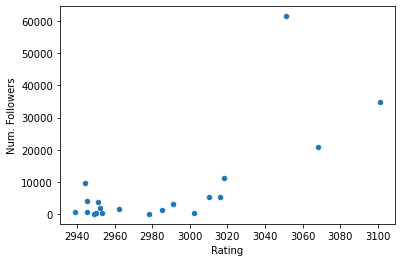

In [225]:
test.plot.scatter(x='Rating', y='Num. Followers')

<AxesSubplot:>

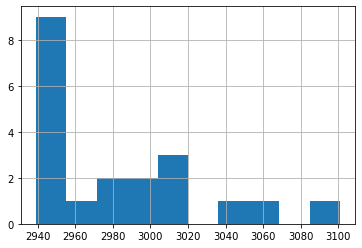

In [229]:
test['Rating'].hist(bins=10)

In [230]:
test.to_csv("Lichess.org Scrape.csv")

In [78]:
import time

# define function
def scrape_user_stats(lichess_user_id):
    print(user_ID)
    
    player_url = "https://lichess.org/@/" + user_ID
    print(player_url)
    
    player_response = requests.get(player_url)
    
    player_soup = BeautifulSoup(player_response.text, 'html.parser')
    
    join_date = get_join_date(player_soup=player_soup)
    
    time_spent_online = get_time_spent_online(player_soup=player_soup)
    
    followers = get_num_followers(player_soup=player_soup)

# apply function
for user_ID in [players_df['Username'].iloc[0]]:
  
    scrape_user_stats(user_ID)

    time.sleep(1) 

nihalsarin2004
https://lichess.org/@/nihalsarin2004


NameError: name 'get_join_date' is not defined

In [98]:
# let's get their join date
# member_since = player_soup.select('.thin:nth-child(1)')

# let's see its format
# print(member_since)

# we need to get the text from here and clean it
# member_since.text

# we forgot that member_since is a list! (even though it just has one element, it's' still a list).
# let's get the text from its only element:
# print([x.text for x in member_since])

# great! we just need to clean this to get useful information out - we're almost there
def get_membership_date(string):
    split_str = string.split('since')[1]
    return split_str

#test our function:
# print(get_membership_date([x.text for x in member_since][0]))

# ok the function looks good, let's put it into our 

In [ ]:
def get_join_date(player_soup):
    member_since = player_soup.select('.thin:nth-child(1)')
    
    return get_membership_date([x.text for x in member_since][0])

### Get Time Spent Online

In [73]:
def get_time_spent_online(player_soup):

    time_spent = player_soup.select('p:nth-child(4)')
    
    time_spent = [x.text for x in time_spent]
    
    return time_spent

In [74]:
get_time_spent_online(player_soup)

NameError: name 'player_soup' is not defined

### Get # followers 

In [75]:
def get_num_followers(player_soup):
    num_followers = player_soup.select('.user-show__social .nm-item:nth-child(1)')
    
    num_followers = [x.text for x in num_followers]
    
    num_followers = num_followers[0].split('f')[0]
    
    num_followers = num_followers.replace(',','')
    
    num_followers = int(num_followers)
    
    return num_followers

In [76]:
get_num_followers(player_soup)

NameError: name 'player_soup' is not defined

### Get bio - NOT DONE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
def get_bio(player_soup):
    
    bio = player_soup.select('.bio')
    
    print(bio)

In [ ]:
get_bio(player_soup)

In [ ]:
mik_url = "https://lichess.org/@/" + 'mgaster'
print(mik_url)

mik_response = requests.get(mik_url)

mik_soup = BeautifulSoup(mik_response.text, 'html.parser')

In [ ]:
player_soup.select('.patron')

In [ ]:
mik_soup.select('.patron')

# MAYBE TRY XPATH HERE?